In [21]:
import numpy as np
import joblib
from keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [22]:
# Muat semua yang kita butuhkan
model = load_model('models/model_dinamis_jz.keras')
test_data = joblib.load('models/test_data_dinamis.pkl')
label_map = joblib.load('models/label_map_dinamis.pkl')

# Ekstrak data uji
X_test = test_data['X_test']
y_test = test_data['y_test']

# Buat daftar nama kelas dari label_map
class_names = list(label_map.keys())

print("Model dan data uji berhasil dimuat.")

Model dan data uji berhasil dimuat.


In [23]:
# Lakukan prediksi pada data uji
y_pred_probs = model.predict(X_test)

# Ubah hasil probabilitas menjadi satu label (kelas dengan probabilitas tertinggi)
y_pred = np.argmax(y_pred_probs, axis=1)

# Ubah juga y_test dari format one-hot encoding ke label tunggal
y_true = np.argmax(y_test, axis=1)

print("Prediksi selesai.")

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 364ms/step
Prediksi selesai.


Laporan Klasifikasi Lengkap:

              precision    recall  f1-score   support

           J       1.00      1.00      1.00        15
           Z       1.00      1.00      1.00        15
     Lainnya       1.00      1.00      1.00        30

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



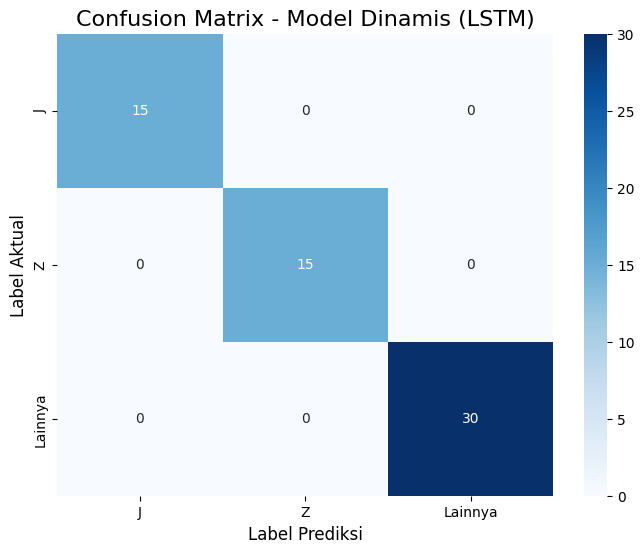

In [24]:
# 1. Tampilkan Laporan Klasifikasi
print("Laporan Klasifikasi Lengkap:\n")
print(classification_report(y_true, y_pred, target_names=class_names))

# 2. Buat dan Tampilkan Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)

plt.title('Confusion Matrix - Model Dinamis (LSTM)', fontsize=16)
plt.ylabel('Label Aktual', fontsize=12)
plt.xlabel('Label Prediksi', fontsize=12)
plt.show()